# Basic HAR file analysis

In [1]:
import io
from urllib.parse import urlparse
import pandas as pd

df2 = pd.read_csv('https://storage.googleapis.com/thecodeship/menadevs-har-logs.csv')

def extract_base(url):
    parsed_uri = urlparse(url)
    return '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

df2['baseUrl'] = df2.apply(lambda row: extract_base(row['requestUrl']), axis=1)

df2.head()

,pageRef,startedDateTime,requestMethod,requestUrl,requestHttpVersion,requestHeaderSize,responseStatus,responseContentSize,responseContentType,responseCacheControl,time,blocked,dns,ssl,connect,send,wait,receive,_blocked_queueing,baseUrl
0,page_10,2020-05-26T06:59:47.693Z,GET,https://menadevs.com/users/sign_in,HTTP/1.1,0,200,11013,nosniff,"max-age=0, private, must-revalidate",443.480,3.939,0.018,136.786,271.814,0.303,165.698,1.708,2.248,https://menadevs.com/
1,page_9,2020-05-26T06:59:41.585Z,GET,https://menadevs.com/contact,HTTP/1.1,0,200,10835,nosniff,"max-age=0, private, must-revalidate",163.981,3.187,-1.000,-1.000,-1.000,0.122,159.091,1.581,1.764,https://menadevs.com/
2,page_8,2020-05-26T06:59:39.624Z,GET,https://menadevs.com/directory/users?name=t,HTTP/1.1,0,200,13469,nosniff,"max-age=0, private, must-revalidate",184.078,4.799,-1.000,-1.000,-1.000,0.134,177.101,2.044,3.115,https://menadevs.com/
3,page_7,2020-05-26T06:59:37.215Z,GET,https://menadevs.com/directory/users?name=f,HTTP/1.1,0,200,14011,nosniff,"max-age=0, private, must-revalidate",179.529,2.917,-1.000,-1.000,-1.000,0.125,173.836,2.651,1.679,https://menadevs.com/
4,page_6,2020-05-26T06:59:34.289Z,GET,https://menadevs.com/directory/users?name=b,HTTP/1.1,0,200,12529,nosniff,"max-age=0, private, must-revalidate",459.336,4.618,0.013,142.017,286.925,0.370,166.172,1.238,2.153,https://menadevs.com/


## Requests per page

In [2]:
df2.groupby('pageRef').count()[['startedDateTime']]

,startedDateTime
pageRef,
page_1,30
page_10,23
page_2,21
page_3,22
page_4,38
page_5,28
page_6,22
page_7,24
page_8,23


## 3rd party request domains

In [3]:
excluded_domains = ['https://menadevs.com/']



df_third_party = df2.loc[~df2['baseUrl'].isin(excluded_domains)]

df_third_party.groupby('baseUrl').count()[['pageRef']]

,pageRef
baseUrl,
https://fonts.googleapis.com/,10
https://fonts.gstatic.com/,68
https://platform.slack-edge.com/,1
https://stats.g.doubleclick.net/,1
https://www.google-analytics.com/,20
https://www.google.ae/,1
https://www.google.com/,11
https://www.gstatic.com/,10


## Requested HTTP Version

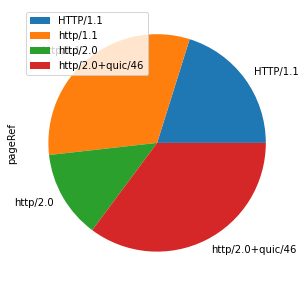

In [4]:
http_version_count = df2.groupby('requestHttpVersion').count()[['pageRef']].plot.pie(y='pageRef', figsize=(5, 5))

## Requested Mime Types

In [5]:
mime_type_count = df2.groupby('responseContentType').count()[['pageRef']].sort_values(ascending=False, by='pageRef')
mime_type_count

,pageRef
responseContentType,
font/woff2,61
nosniff,49
image/png,39
application/javascript,30
image/jpeg,19
application/octet-stream,14
application/font-woff,10
text/css,10
text/javascript,10
